### 1) Import Data

In [1]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/Shizu-ka/bruvv/main/weatherAUS.csv

--2023-12-16 15:04:27--  https://raw.githubusercontent.com/Shizu-ka/bruvv/main/weatherAUS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14167326 (14M) [text/plain]
Saving to: ‘weatherAUS.csv’

weatherAUS.csv      100%[===================>]  13.51M  --.-KB/s    in 0.1s    

2023-12-16 15:04:27 (98.2 MB/s) - ‘weatherAUS.csv’ saved [14167326/14167326]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
ori = pd.read_csv('weatherAUS.csv')
df = pd.read_csv('weatherAUS.csv')
df_mean = pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### 1) Menyimpan kelas dan menghapus kolom yang tidak berguna

In [6]:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

Karena Evaporation, Sunshine, Cloud9am, Cloud3pm mengandung nilai nol lebih dari 30%, bakal kurang membantu untuk model makanya dihapus.
date juga ga diperlukan

In [7]:
df = df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)
df_mean = df_mean.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


### 1) Preprosesing


In [8]:
zero_rows = df.loc[(df == 0).any(axis=1)]
print(zero_rows)

       Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
5        Albury     14.6     29.7       0.2         WNW           56.0   
...         ...      ...      ...       ...         ...            ...   
142188    Uluru      3.5     21.8       0.0           E           31.0   
142189    Uluru      2.8     23.4       0.0           E           31.0   
142190    Uluru      3.6     25.3       0.0         NNW           22.0   
142191    Uluru      5.4     26.9       0.0           N           37.0   
142192    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          

Mengubah kata menjadi numeric

In [9]:
cat_list = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']
for column in cat_list:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes
    df[column].replace(-1, np.NaN, inplace=True)

    df_mean[column] = pd.Categorical(df_mean[column])
    df_mean[column] = df_mean[column].cat.codes
    df_mean[column].replace(-1, np.NaN, inplace=True)

In [10]:
from sklearn.impute import KNNImputer

def filling_null(feature, df=df):

    #make train set and test set
    temp_df = df.copy().drop('RainTomorrow', axis=1)
    df_list = list(temp_df.columns)
    df_list.remove(feature)
    temp_df.dropna(subset=df_list, inplace=True)
    train = temp_df.loc[temp_df.notna()[feature]]
    train_x = train.drop(feature, axis=1)
    train_y = train[feature]
    test = temp_df[temp_df.isnull()[feature]].drop(feature,axis=1)

    #run machine learning model and predict null values
    KNN = KNeighborsRegressor(n_jobs=-1)
    KNN.fit(train_x, train_y)
    change_NaN = KNN.predict(test)
    index_list = test.index.tolist()
    for i in range(len(change_NaN)):
        df.at[index_list[i], feature]= change_NaN[i]

    #return dataset which had been changed
    return df

In [11]:
apply_list =['MinTemp', 'MaxTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Humidity9am',
             'Humidity3pm', 'Pressure9am', 'Pressure3pm']
for feature in apply_list:
    df = filling_null(feature = feature)

In [12]:
print(df.isnull().values.any())
print(df_mean.isnull().values.any())

True
True


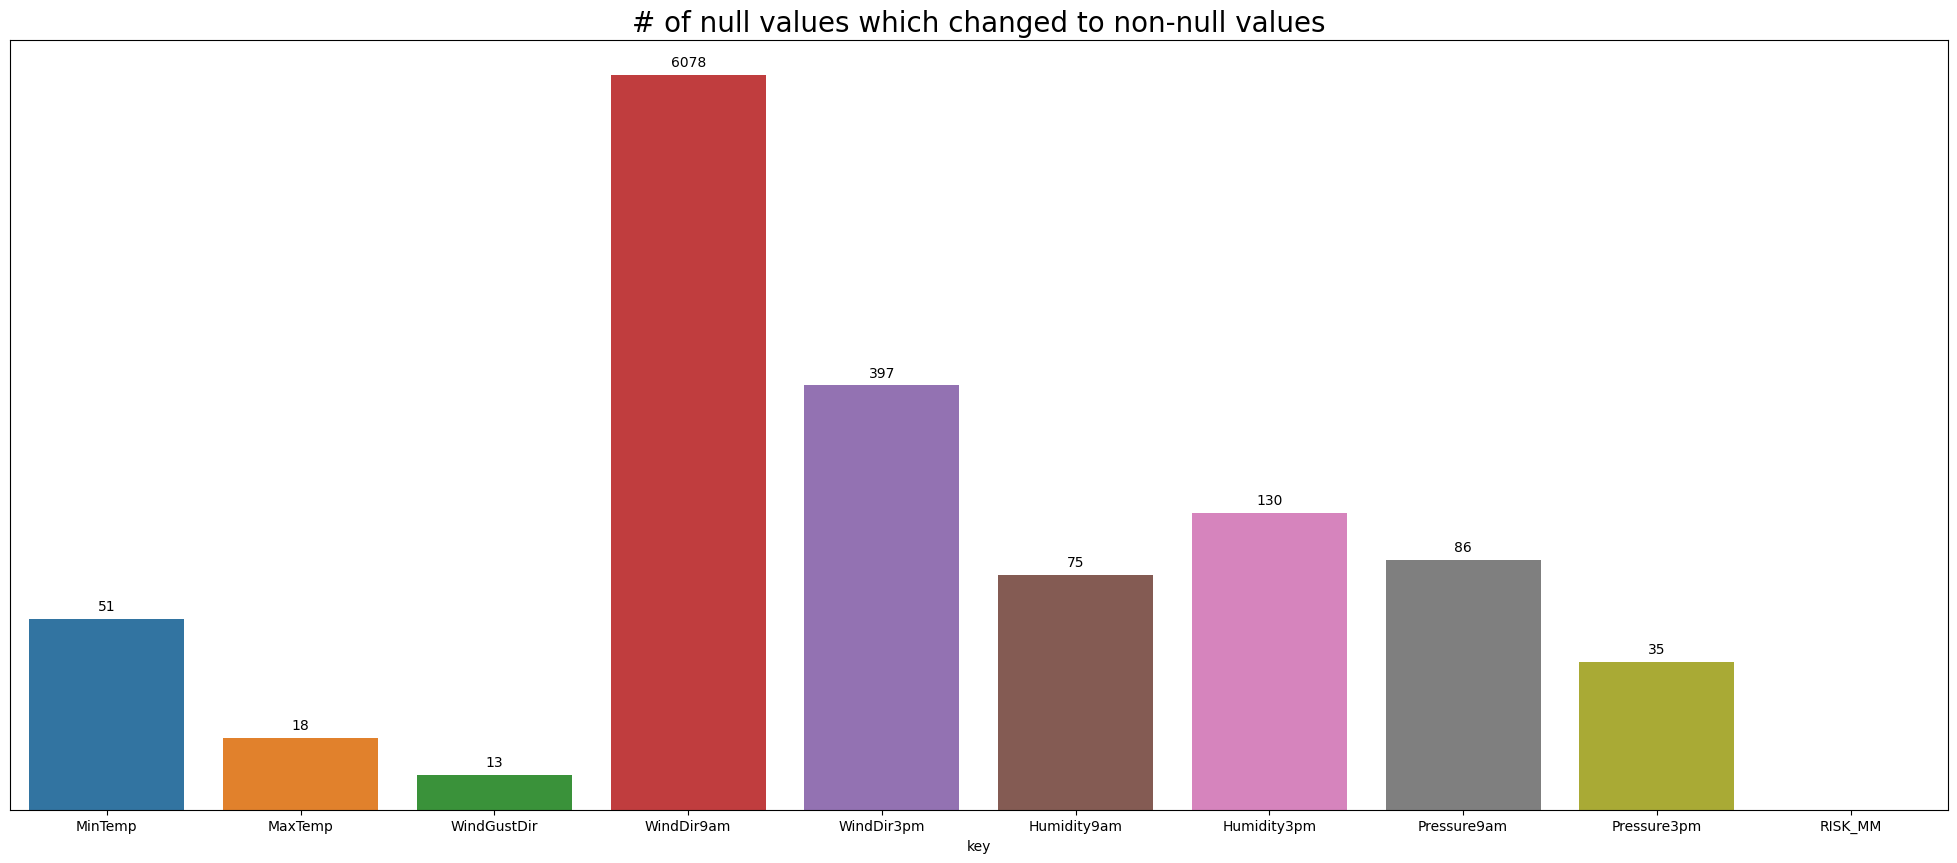

In [13]:
#getting information of number of null variable changed
df_columns = list(df.columns)
changed_dict = {}
for col in df_columns:
    changed_dict["%s" %col] = len(df[col].dropna()) - len(ori[col].dropna())

#delet features which did not changed at all
pop_list = ['Location','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
for feature in pop_list:
    changed_dict.pop(feature)

#make list of key and value to visualize the graph
key_list = []
value_list = []
for key, value in changed_dict.items():
    key_list.append(key)
    value_list.append(value)

temp_df = pd.DataFrame()
temp_df['key'] = key_list
temp_df['value'] = value_list

#visualization
plt.figure(figsize=(25, 10))
plot = sns.barplot(x='key',y='value', data=temp_df)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '0.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.yscale('log')
plot.axes.get_yaxis().set_visible(False)
plt.title('# of null values which changed to non-null values', fontsize=20)
plt.show()

In [14]:
df_Xnul = df.fillna(df.mean())

In [15]:
df_Xnul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int8   
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  float64
 7   WindDir3pm     142193 non-null  float64
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  float64
 17  RISK_MM        142193 non-nul

### 1) Splitting data training & tes


In [16]:
X = df_Xnul.drop(['RainTomorrow'], axis=1)
y = df_Xnul['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

### 1) Membuat Model


In [17]:
classifier_names = ["Naive Bayes","Decision Tree", "SVM"]

classifiers = [GaussianNB(), DecisionTreeClassifier(), SVC()]

zipped_clf = zip(classifier_names,classifiers)

In [18]:
models = []
def fit_classifier(pipeline, X_train, y_train, X_test, y_test):
    model_fit = pipeline.fit(X_train, y_train)
    models.append(model_fit)
    y_pred = model_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print()
    return accuracy

In [19]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [20]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)

Validation result for Naive Bayes
GaussianNB()
accuracy score: 95.73%

Validation result for Decision Tree
DecisionTreeClassifier()
accuracy score: 100.00%

Validation result for SVM
SVC()
accuracy score: 98.72%



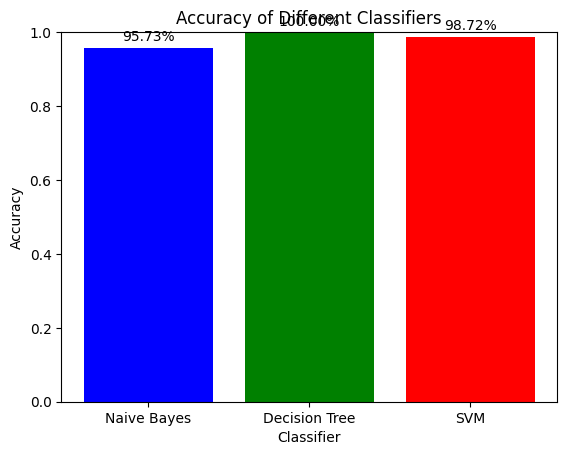

In [21]:
classifier_names, accuracy_scores = zip(*result)

plt.bar(classifier_names, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, "{:.2f}%".format(v * 100), ha='center', va='bottom')

plt.show()

### 1) Evaluasi


In [22]:
# Naive Bayes
model_gaussian = GaussianNB()
model_gaussian.fit(X, y)

cv_scores = cross_val_score(model_gaussian, X_train, y_train, cv=5, scoring='accuracy')

mean_score = cv_scores.mean()
std_score = cv_scores.std()

model_gaussian.fit(X_train, y_train)

train_score = model_gaussian.score(X_train, y_train)

test_score = model_gaussian.score(X_test, y_test)

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Mean Cross-Validation Score: 0.9589893002461445
Standard Deviation of Cross-Validation Scores: 0.001687609270997798
Training Score: 0.9590495805495555
Testing Score: 0.9573116414271648


In [26]:
y_pred_cv = cross_val_predict(model_gaussian, X_train, y_train, cv=5)

class_report = classification_report(y_train, y_pred_cv)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     77183
           1       0.85      1.00      0.92     22352

    accuracy                           0.96     99535
   macro avg       0.92      0.97      0.94     99535
weighted avg       0.97      0.96      0.96     99535



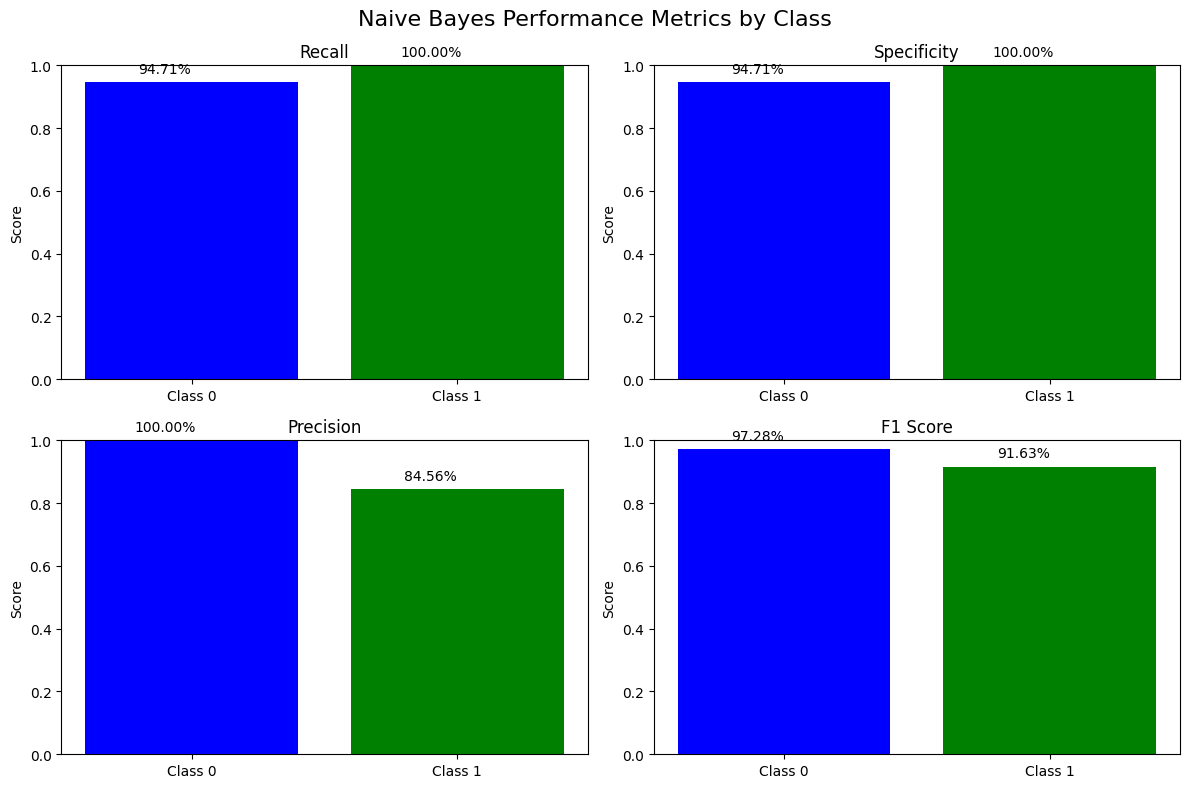

In [27]:
class_report = classification_report(y_train, y_pred_cv, output_dict=True)
cm = confusion_matrix(y_train, y_pred_cv)

recall = [class_report[label]['recall'] for label in class_report.keys() if label in ['0', '1']]
precision = [class_report[label]['precision'] for label in class_report.keys() if label in ['0', '1']]
f1_score = [class_report[label]['f1-score'] for label in class_report.keys() if label in ['0', '1']]
specificity = [(cm[0, 0] / (cm[0, 0] + cm[0, 1])), (cm[1, 1] / (cm[1, 0] + cm[1, 1]))]


labels = ['Class 0', 'Class 1']
metrics = [recall, specificity, precision, f1_score]
metric_names = ['Recall', 'Specificity', 'Precision', 'F1 Score']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(labels, metric, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.title(metric_names[i])
    plt.ylabel('Score')


    for bar, score in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02,
                 "{:.2%}".format(score), ha='center', va='bottom')

plt.suptitle('Naive Bayes Performance Metrics by Class', fontsize=16)

plt.tight_layout()
plt.show()

In [28]:
# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree.fit(X, y)

cv_scores = cross_val_score(model_tree, X_train, y_train, cv=5, scoring='accuracy')

mean_score = cv_scores.mean()
std_score = cv_scores.std()

model_tree.fit(X_train, y_train)

train_score = model_tree.score(X_train, y_train)

test_score = model_tree.score(X_test, y_test)

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Mean Cross-Validation Score: 1.0
Standard Deviation of Cross-Validation Scores: 0.0
Training Score: 1.0
Testing Score: 1.0


In [29]:
y_pred_cv = cross_val_predict(model_tree, X_train, y_train, cv=5)

class_report = classification_report(y_train, y_pred_cv)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77183
           1       1.00      1.00      1.00     22352

    accuracy                           1.00     99535
   macro avg       1.00      1.00      1.00     99535
weighted avg       1.00      1.00      1.00     99535



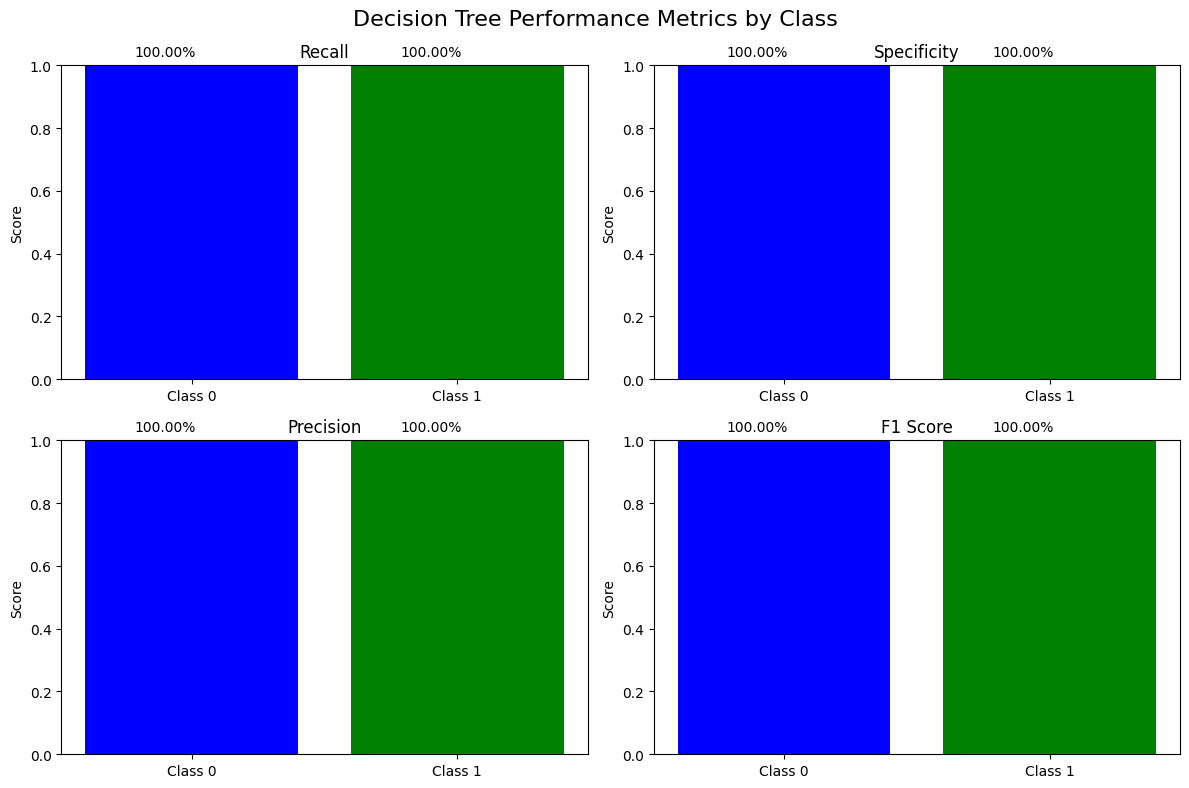

In [30]:
class_report = classification_report(y_train, y_pred_cv, output_dict=True)
cm = confusion_matrix(y_train, y_pred_cv)

recall = [class_report[label]['recall'] for label in class_report.keys() if label in ['0', '1']]
precision = [class_report[label]['precision'] for label in class_report.keys() if label in ['0', '1']]
f1_score = [class_report[label]['f1-score'] for label in class_report.keys() if label in ['0', '1']]
specificity = [(cm[0, 0] / (cm[0, 0] + cm[0, 1])), (cm[1, 1] / (cm[1, 0] + cm[1, 1]))]


labels = ['Class 0', 'Class 1']
metrics = [recall, specificity, precision, f1_score]
metric_names = ['Recall', 'Specificity', 'Precision', 'F1 Score']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(labels, metric, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.title(metric_names[i])
    plt.ylabel('Score')


    for bar, score in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02,
                 "{:.2%}".format(score), ha='center', va='bottom')

plt.suptitle('Decision Tree Performance Metrics by Class', fontsize=16)

plt.tight_layout()
plt.show()

In [31]:
# SVM
model_svm = SVC()
model_svm.fit(X, y)

cv_scores = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='accuracy')

mean_score = cv_scores.mean()
std_score = cv_scores.std()

model_svm.fit(X_train, y_train)

train_score = model_svm.score(X_train, y_train)

test_score = model_svm.score(X_test, y_test)

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Mean Cross-Validation Score: 0.8635555332295173
Standard Deviation of Cross-Validation Scores: 0.0013692315568475662
Training Score: 0.8686391721504998
Testing Score: 0.8706221576257678


In [32]:
y_pred_cv = cross_val_predict(model_svm, X_train, y_train, cv=5)

class_report = classification_report(y_train, y_pred_cv)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     77183
           1       0.99      0.40      0.57     22352

    accuracy                           0.86     99535
   macro avg       0.92      0.70      0.74     99535
weighted avg       0.88      0.86      0.84     99535



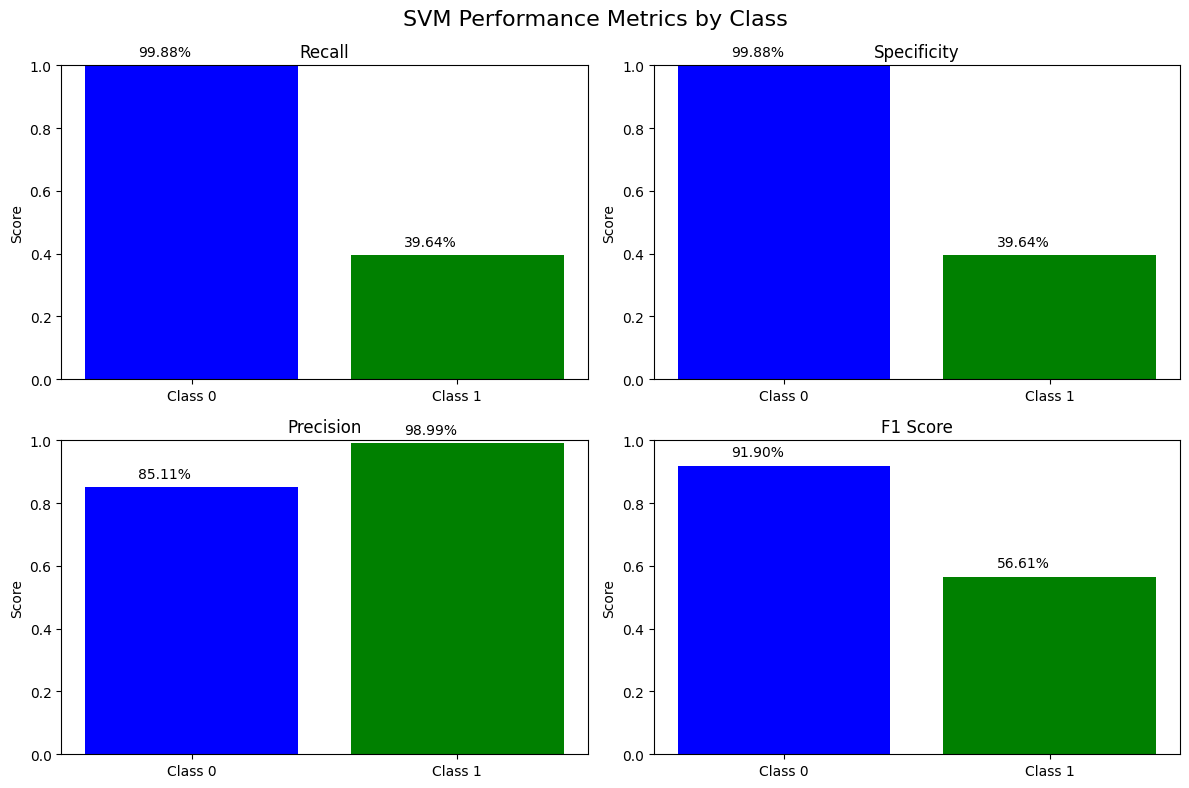

In [33]:
class_report = classification_report(y_train, y_pred_cv, output_dict=True)
cm = confusion_matrix(y_train, y_pred_cv)

recall = [class_report[label]['recall'] for label in class_report.keys() if label in ['0', '1']]
precision = [class_report[label]['precision'] for label in class_report.keys() if label in ['0', '1']]
f1_score = [class_report[label]['f1-score'] for label in class_report.keys() if label in ['0', '1']]
specificity = [(cm[0, 0] / (cm[0, 0] + cm[0, 1])), (cm[1, 1] / (cm[1, 0] + cm[1, 1]))]


labels = ['Class 0', 'Class 1']
metrics = [recall, specificity, precision, f1_score]
metric_names = ['Recall', 'Specificity', 'Precision', 'F1 Score']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(labels, metric, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.title(metric_names[i])
    plt.ylabel('Score')


    for bar, score in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02,
                 "{:.2%}".format(score), ha='center', va='bottom')

plt.suptitle('SVM Performance Metrics by Class', fontsize=16)

plt.tight_layout()
plt.show()